In [18]:
import nltk, collections
import string

from nltk.corpus import stopwords
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xxlen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# Читаем книгу и записываем ее в переменную
with open('The_Little_Prince.txt') as book:
    read_book = book.read()

In [20]:
# Токинизируем текс
word_tokens = word_tokenize(read_book)
len(word_tokens)

21186

In [21]:
# Удаляю знаки препинания и перевожу все слова в нижний регистр
remove_punctuation = str.maketrans('', '', string.punctuation)
lower_text = [x for x in [t.translate(remove_punctuation).lower() for t in word_tokens] if len(x) > 0]

# Без Удаления стоп слов

In [22]:
# Лексическое разнообразие
lexical_diversity = (len(set(lower_text)) / len(lower_text)) * 100
print("Лексическое разнообразие текста составляет", lexical_diversity, "%")

Лексическое разнообразие текста составляет 12.517539756782039 %


In [23]:
# 2. Определить самое частое, самое редкое и медианное по частоте использования слово

# FreqDist Упорядочит слова по убыванию частоты использования
fdist = FreqDist(lower_text) 

data = []

# Заношу слова в список для обращения к ним.
for word in fdist:
    data.append(word)

most_frequent = data[0] 
the_rarest = data[len(data)-1]
# Медианно значение в этом случае будет середина списка.
median = data[len(data) // 2] 

print ("Самое частое по частоте использования слово ", most_frequent)
print ("Самое редкое по частоте использования слово", the_rarest)
print ("Меианное по частоте использования", median)

Самое частое по частоте использования слово  the
Самое редкое по частоте использования слово word
Меианное по частоте использования indulgence


In [24]:
# 3. Определить самое часто используемое существительное, прилагательное и глагол
nouns = []
verbs = []
adjectives = []

# Определяю к какому типу относится слово
text =  nltk.pos_tag(lower_text)

# Разбиваю слова на списки по частям речи 
for word in text:
    if 'NN' == word[1]:
        nouns.append(word[0])
    if 'VB' == word[1]:
        verbs.append(word[0])
    if 'JJ' == word[1]:
        adjectives.append(word[0])

In [25]:
# Упорядочим слова по убыванию частоты использования
NN = FreqDist(nouns)
VB = FreqDist(verbs)
JJ = FreqDist(adjectives)

print("Cамое часто используемое существительное", NN.max())
print("Cамое часто используемое прилагательное", JJ.max())
print("Cамое часто используемый глагол", VB.max())

Cамое часто используемое существительное i
Cамое часто используемое прилагательное little
Cамое часто используемый глагол be


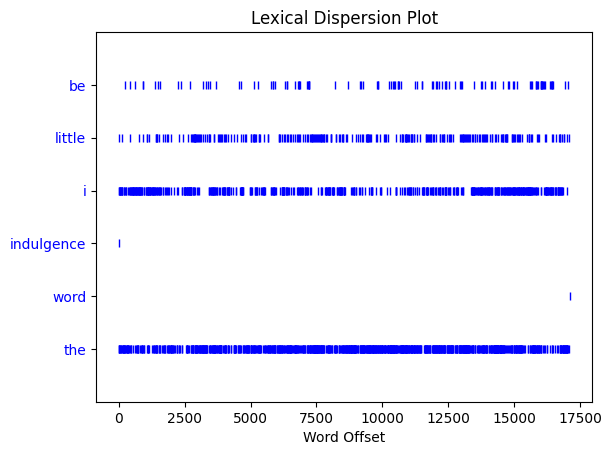

In [26]:
#4. Вывести график дисперсии слов из п. 2 и 3
text = nltk.Text(lower_text)
text.dispersion_plot([VB.max(), JJ.max(), NN.max(), median, the_rarest, most_frequent])

# Все тоже самое только с удалением стоп слов

In [27]:
# В тексте часто встречается символ � и машиной он читается как 'пїѕ'. Я рещил его добавить в список стоп слов.
all_stopwords = stopwords.words('english')
all_stopwords.append('пїѕ')
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
# Удаляю стоп слова
tokens_without_stop_w = [word for word in lower_text if not word in all_stopwords]
len(tokens_without_stop_w)

7354

In [29]:
# Лексическое разнообразие
lexical_diversity = (len(set(tokens_without_stop_w )) / len(tokens_without_stop_w)) * 100
print("Лексическое разнообразие текста составляет", lexical_diversity, "%")

Лексическое разнообразие текста составляет 27.454446559695405 %


In [30]:
# 2. Определить самое частое, самое редкое и медианное по частоте использования слово

# FreqDist Упорядочит слова по убыванию частоты использования
fdist = FreqDist(tokens_without_stop_w) 

data = []

# Заношу слова в список для обращения к ним.
for word in fdist:
    data.append(word)

most_frequent = data[0] 
the_rarest = data[len(data)-1]
# Медианно значение в этом случае будет середина списка.
median = data[len(data) // 2] 

print ("Самое частое по частоте использования слово ", most_frequent)
print ("Самое редкое по частоте использования слово", the_rarest)
print ("Меианное по частоте использования", median)

Самое частое по частоте использования слово  little
Самое редкое по частоте использования слово word
Меианное по частоте использования attempt


In [31]:
# 3. Определить самое часто используемое существительное, прилагательное и глагол
nouns = []
verbs = []
adjectives = []

# Определяю к какому типу относится слово
text =  nltk.pos_tag(tokens_without_stop_w)

# Разбиваю слова на списки по частям речи 
for word in text:
    if 'NN' == word[1]:
        nouns.append(word[0])
    if 'VB' == word[1]:
        verbs.append(word[0])
    if 'JJ' == word[1]:
        adjectives.append(word[0])

In [32]:
# Упорядочим слова по убыванию частоты использования
NN = FreqDist(nouns)
VB = FreqDist(verbs)
JJ = FreqDist(adjectives)

print("Cамое часто используемое существительное", NN.max())
print("Cамое часто используемое прилагательное", JJ.max())
print("Cамое часто используемый глагол", VB.max())

Cамое часто используемое существительное prince
Cамое часто используемое прилагательное little
Cамое часто используемый глагол go


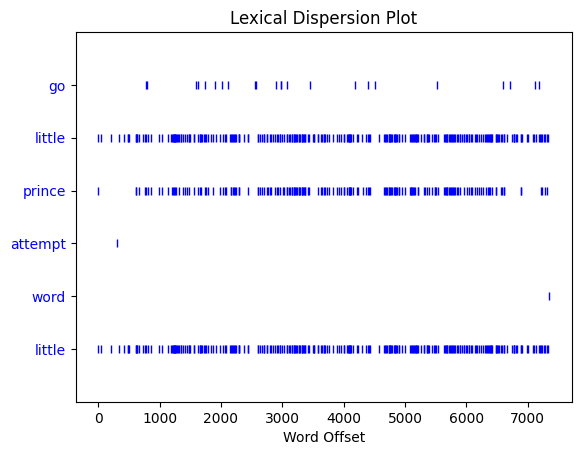

In [33]:
#4. Вывести график дисперсии слов из п. 2 и 3
text = nltk.Text(tokens_without_stop_w)
text.dispersion_plot([VB.max(), JJ.max(), NN.max(), median, the_rarest, most_frequent])